In [1]:
import numpy
import xarray as xr
import matplotlib.pyplot as plt

In [69]:

# Define the file path (use 'r' before the string to handle backslashes)
netcdf_path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow\wflow_Nakuru_2000d_0050d\run_default\outstate\outstates.nc"

# Load NetCDF file
ds = xr.open_dataset(netcdf_path)

# Print dataset information
print(ds)

<xarray.Dataset> Size: 1MB
Dimensions:           (lon: 77, lat: 107, layer: 4, time: 1)
Coordinates:
  * lon               (lon) float64 616B 35.84 35.84 35.85 ... 36.21 36.21 36.22
  * lat               (lat) float64 856B -0.7138 -0.7088 ... -0.1888 -0.1838
  * layer             (layer) float64 32B 1.0 2.0 3.0 4.0
  * time              (time) datetime64[ns] 8B 2000-12-31
Data variables: (12/13)
    ssf               (time, lat, lon) float64 66kB ...
    h_river           (time, lat, lon) float64 66kB ...
    satwaterdepth     (time, lat, lon) float64 66kB ...
    q_land            (time, lat, lon) float64 66kB ...
    h_av_river        (time, lat, lon) float64 66kB ...
    h_land            (time, lat, lon) float64 66kB ...
    ...                ...
    tsoil             (time, lat, lon) float64 66kB ...
    q_river           (time, lat, lon) float64 66kB ...
    canopystorage     (time, lat, lon) float64 66kB ...
    snow              (time, lat, lon) float64 66kB ...
    snowwater 

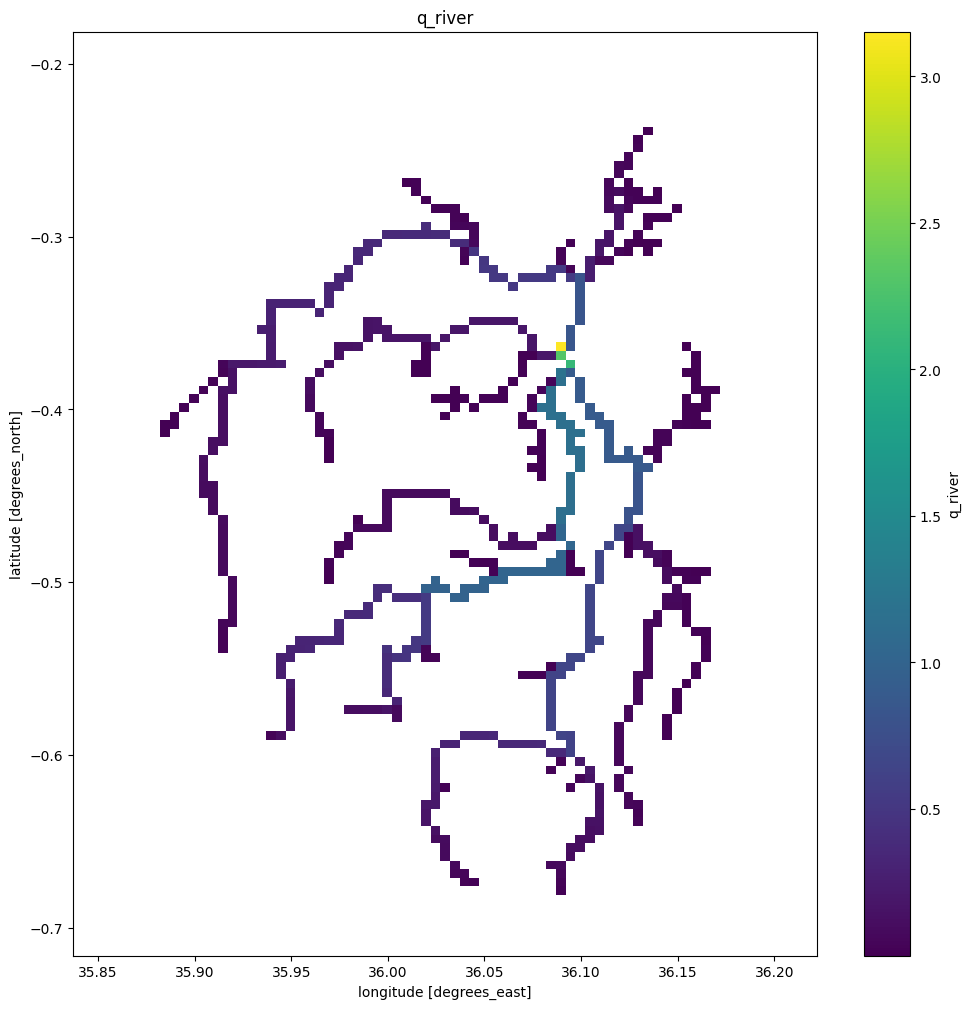

In [82]:
shapefile_path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\RESULTS\Lake Nakuru catchment.shp"


# Replace 'temperature' with the actual variable name in your dataset
var_name = "q_river"
data = ds[var_name]

data = data.rio.write_crs("epsg:4326")
# Reproject to UTM 37S (EPSG:32737)
data_utm = data.rio.reproject("EPSG:32737")

# # Plot the first time step (if time-dependent)
plt.figure(figsize=(12, 12))
data.plot()
#display(data)
plt.title(f"{var_name}")
plt.show()